In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve, roc_auc_score 
)

In [2]:
# Load spam.csv dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# Drop unused columns
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

# Rename columns
df = df.rename(columns={"v1": "label", "v2": "text"})

print("First 5 rows of dataset:")
print(df.head())

print("\nClass distribution:")
print(df["label"].value_counts())

First 5 rows of dataset:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


In [3]:
# Encode labels: ham -> 0, spam -> 1
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})

# Create message length feature
df["message_length"] = df["text"].apply(len)

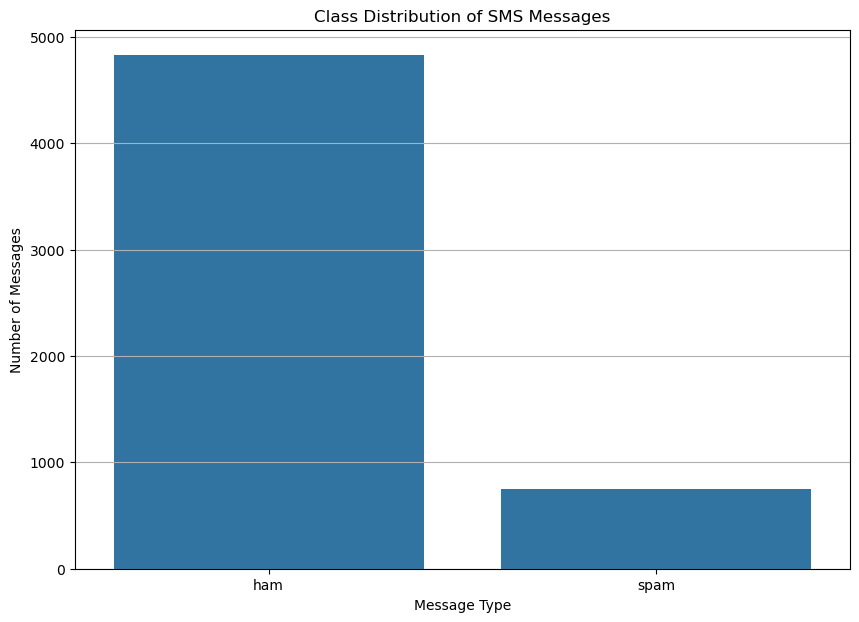

In [4]:
plt.figure(figsize=(10,7))
sns.countplot(x="label", data=df)

plt.title("Class Distribution of SMS Messages")
plt.xlabel("Message Type")
plt.ylabel("Number of Messages")

plt.grid(axis="y")
plt.show()

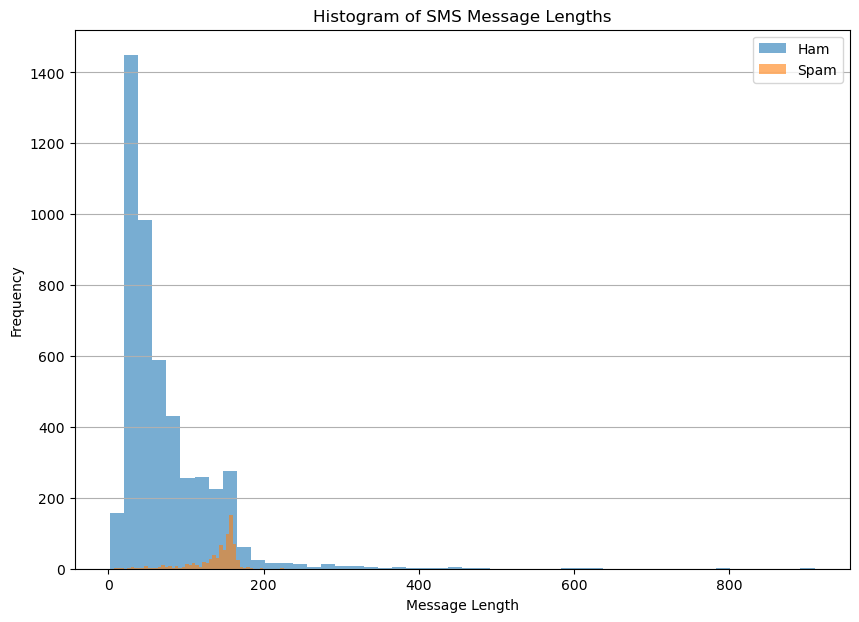

In [5]:
plt.figure(figsize=(10,7))

plt.hist(df[df["label"] == "ham"]["message_length"],
         bins=50, alpha=0.6, label="Ham")

plt.hist(df[df["label"] == "spam"]["message_length"],
         bins=50, alpha=0.6, label="Spam")

plt.title("Histogram of SMS Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")

plt.grid(axis="y")
plt.legend()
plt.show()

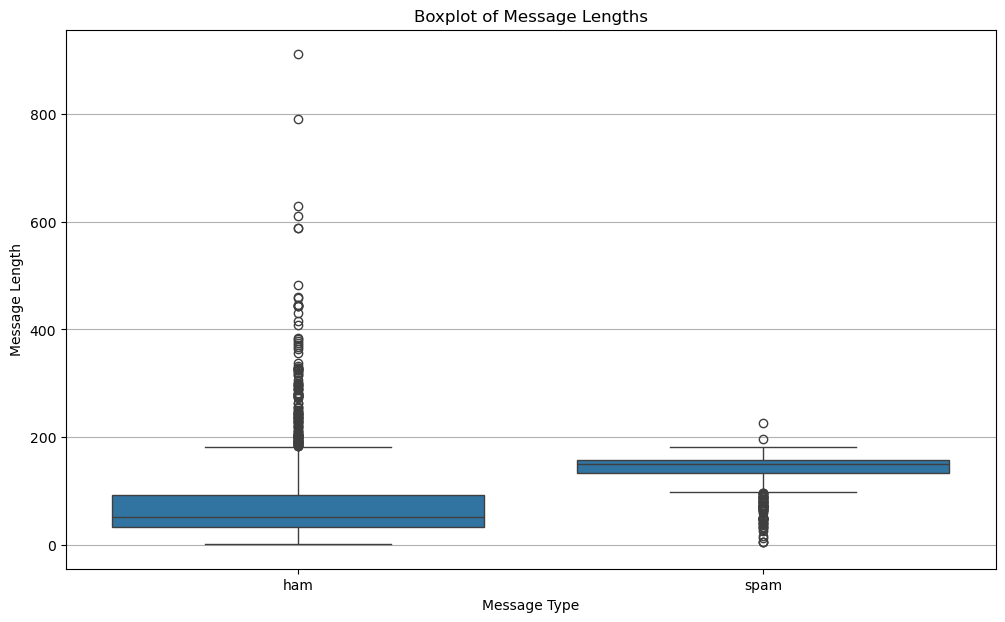

In [6]:
plt.figure(figsize=(12,7))
sns.boxplot(x="label", y="message_length", data=df)

plt.title("Boxplot of Message Lengths")
plt.xlabel("Message Type")
plt.ylabel("Message Length")

plt.grid(axis="y")
plt.show()

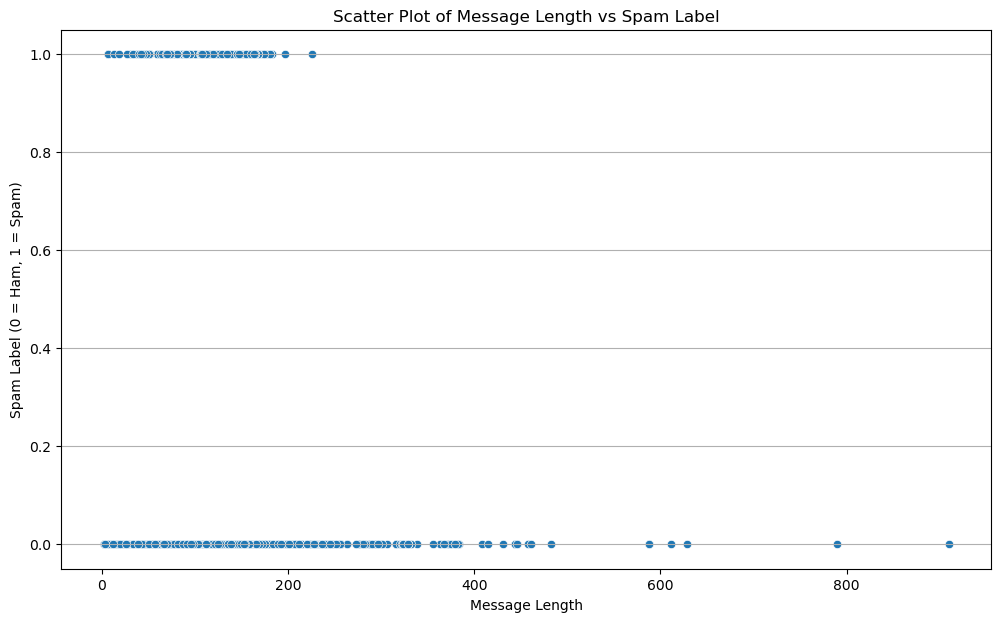

In [7]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df["message_length"], y=df["label_num"])

plt.title("Scatter Plot of Message Length vs Spam Label")
plt.xlabel("Message Length")
plt.ylabel("Spam Label (0 = Ham, 1 = Spam)")

plt.grid(axis="y")
plt.show()

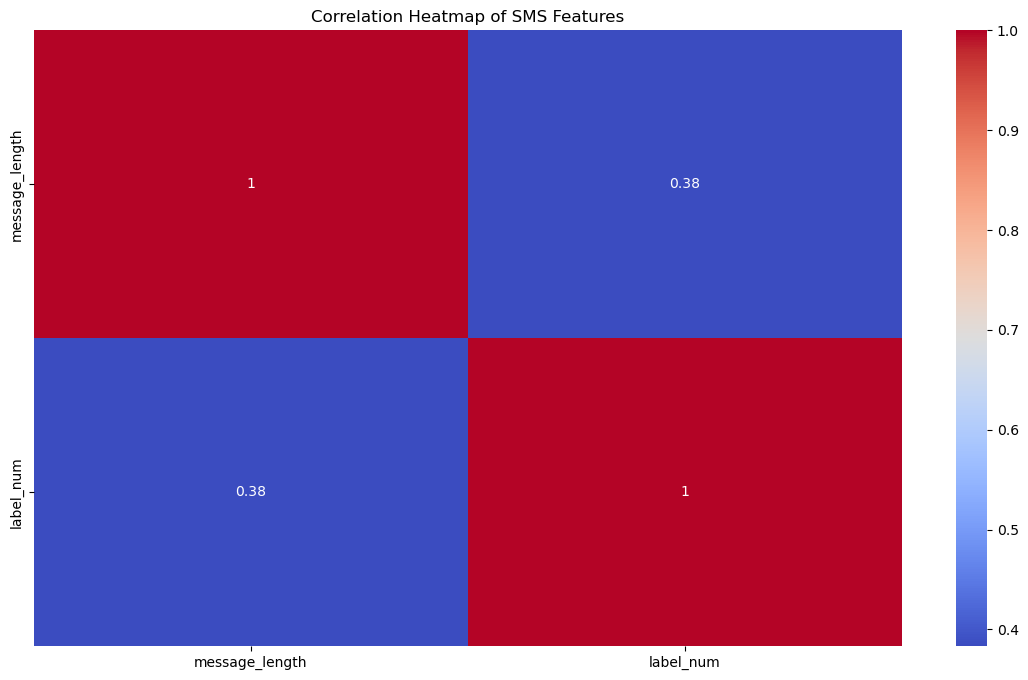

In [8]:
corr_data = df[["message_length", "label_num"]]
corr_matrix = corr_data.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap of SMS Features")
plt.show()

In [9]:
X = df["text"]
y = df["label_num"]

vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1, 2)
)

X_tfidf = vectorizer.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [11]:
nb_model = MultinomialNB()

# Handle class imbalance
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

dt_model = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)

In [12]:
nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [25]:
nb_pred = nb_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [27]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))

evaluate("Naive Bayes", y_test, nb_pred)
evaluate("Logistic Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)


Naive Bayes
Accuracy: 0.9560538116591928
Precision: 1.0
Recall: 0.6711409395973155
F1-score: 0.8032128514056225

Logistic Regression
Accuracy: 0.97847533632287
Precision: 0.9844961240310077
Recall: 0.8523489932885906
F1-score: 0.9136690647482014

Decision Tree
Accuracy: 0.957847533632287
Precision: 0.8269230769230769
Recall: 0.8657718120805369
F1-score: 0.8459016393442623


In [29]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(14,7))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Ham", "Spam"],
        yticklabels=["Ham", "Spam"]
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

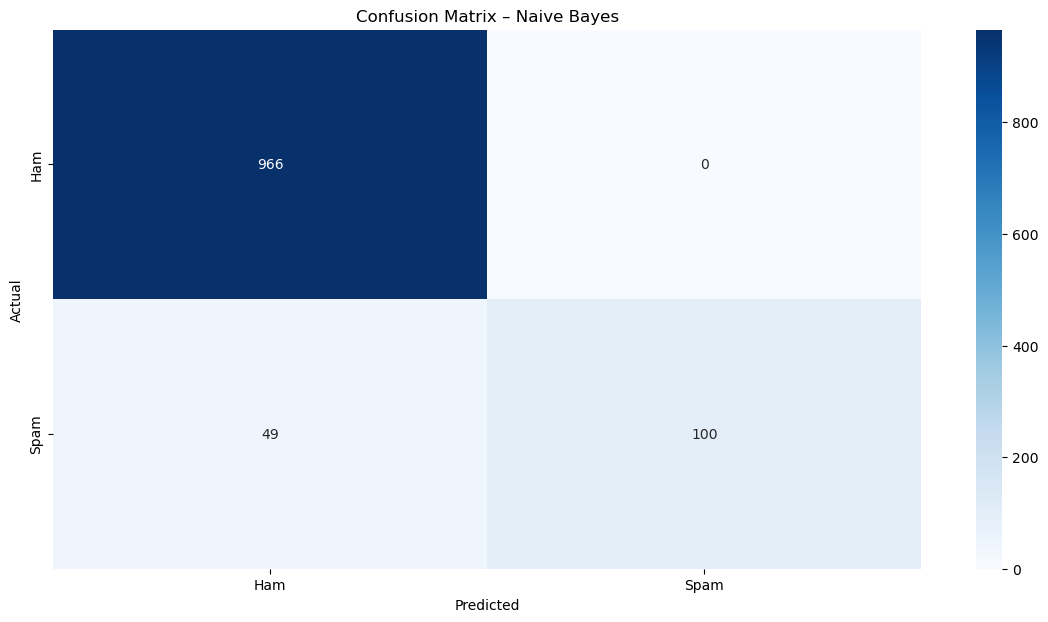

In [31]:
plot_confusion(y_test, nb_pred, "Confusion Matrix – Naive Bayes")

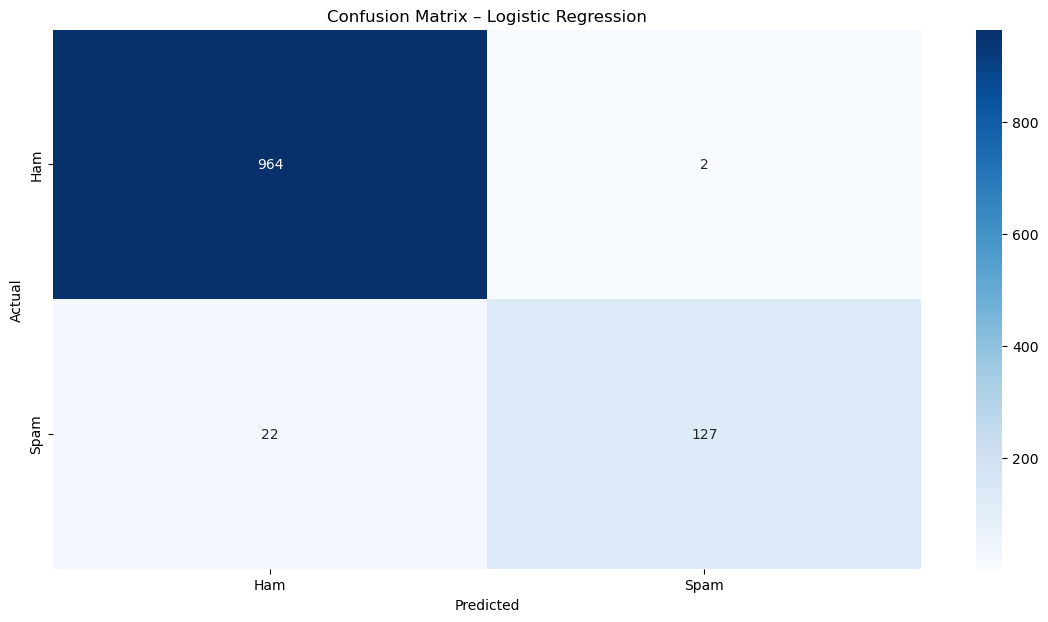

In [33]:
plot_confusion(y_test, lr_pred, "Confusion Matrix – Logistic Regression")

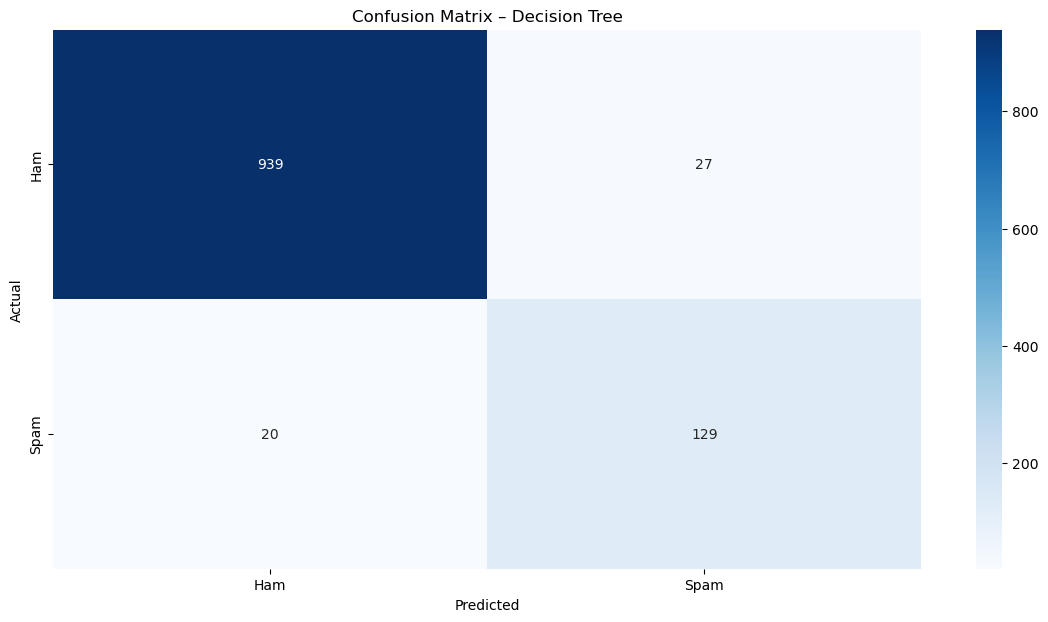

In [35]:
plot_confusion(y_test, dt_pred, "Confusion Matrix – Decision Tree")

In [37]:
results = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred)],
    
    "F1-Score": [
        f1_score(y_test, nb_pred),
        f1_score(y_test, lr_pred),
        f1_score(y_test, dt_pred)],
    
    "Precision": [
        precision_score(y_test, nb_pred),
        precision_score(y_test, lr_pred),
        precision_score(y_test, dt_pred)],
    
    "Recall": [
        recall_score(y_test, nb_pred),
        recall_score(y_test, lr_pred),
        recall_score(y_test, dt_pred)]})

print(results)

                 Model  Accuracy  F1-Score  Precision    Recall
0          Naive Bayes  0.956054  0.803213   1.000000  0.671141
1  Logistic Regression  0.978475  0.913669   0.984496  0.852349
2        Decision Tree  0.957848  0.845902   0.826923  0.865772


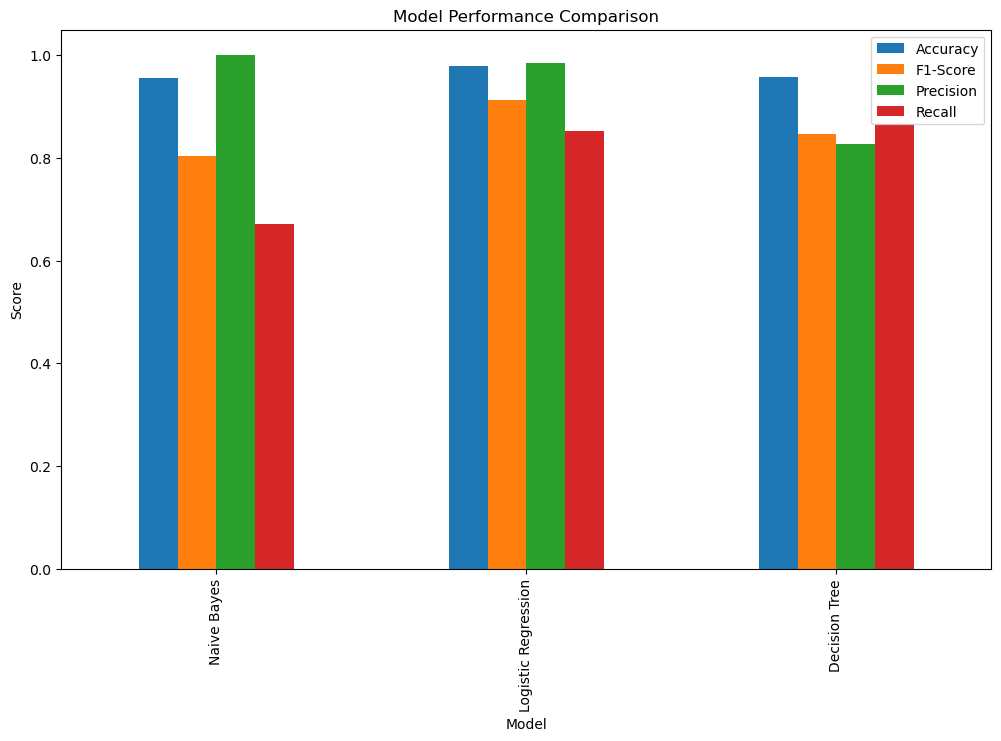

In [39]:
results.set_index("Model").plot(kind="bar", figsize=(12,7))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

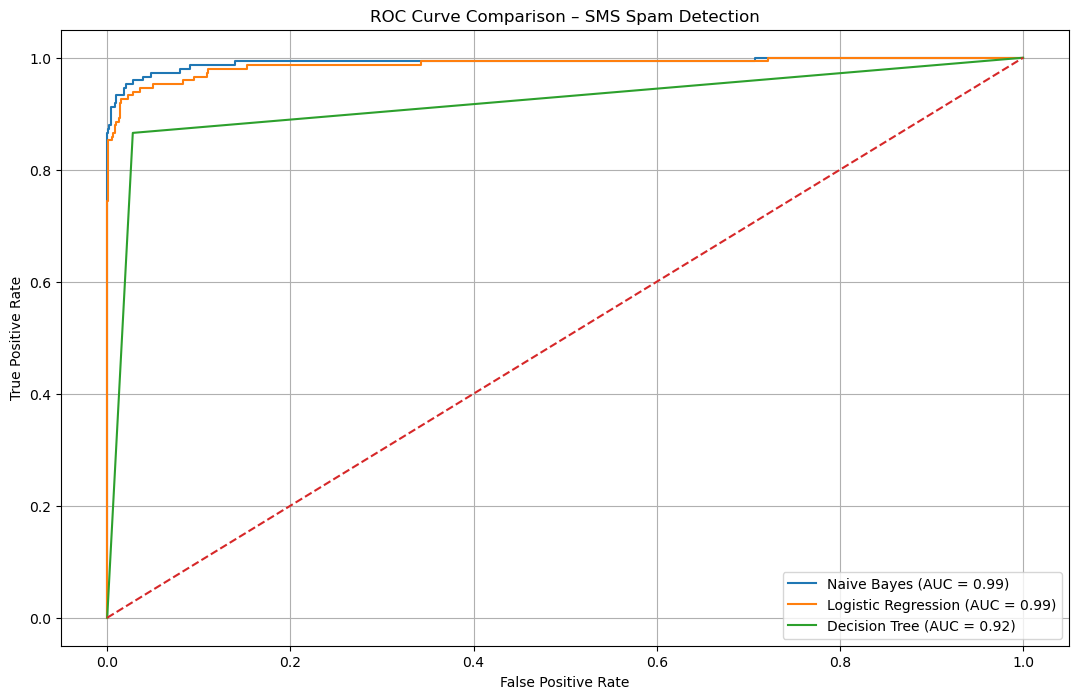

In [57]:
models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model
}

plt.figure(figsize=(13, 8))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison – SMS Spam Detection')
plt.legend()
plt.grid()
plt.show()

In [57]:
def predict_sms(message):
    message_vec = vectorizer.transform([message])
    spam_prob = lr_model.predict_proba(message_vec)[0][1]

    if spam_prob >= 0.3:
        return "SPAM"
    else:
        return "HAM"

In [ ]:
print("\n----------------------- SMS Spam Detection System ------------------------")

while True:
    user_input = input("Enter SMS (or type 'exit'): ")
    if user_input.lower() == "exit":
        print("Exiting system...")
        break
    print("Prediction:", predict_sms(user_input))


----------------------- SMS Spam Detection System ------------------------
